## 기본모듈준비

In [1]:
import os, pathlib
import numpy as np
import tensorflow as tf
import IPython.display as display
from PIL import Image
import matplotlib.pyplot as plt
print(tf.__version__)
# Make numpy values easier to read.
np.set_printoptions(precision=3, suppress=True)

2.0.0


In [2]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

In [3]:
data_dir = tf.keras.utils.get_file( origin='https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',
                                    fname='flower_photos', untar=True)
data_dir = pathlib.Path(data_dir)

In [4]:
image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

3670

In [45]:
image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
BATCH_SIZE = 32
IMG_HEIGHT = 224
IMG_WIDTH = 224
STEPS_PER_EPOCH = np.ceil(image_count/BATCH_SIZE)
CLASS_NAMES = np.array(['daisy', 'roses', 'dandelion', 'sunflowers', 'tulips'])

In [6]:
train_data_gen = image_generator.flow_from_directory(directory=str(data_dir),
                                                     batch_size=BATCH_SIZE,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     classes = list(CLASS_NAMES))

Found 3670 images belonging to 5 classes.


In [21]:
image_batch, label_batch = next(train_data_gen)

In [49]:
def show_batch(image_batch, label_batch):
    plt.figure(figsize=(10,10))
    for n in range(25):
        ax = plt.subplot(5,5,n+1)
        plt.imshow(image_batch[n])
        plt.title(CLASS_NAMES[label_batch[n]==1][0].title())
        plt.axis('off')

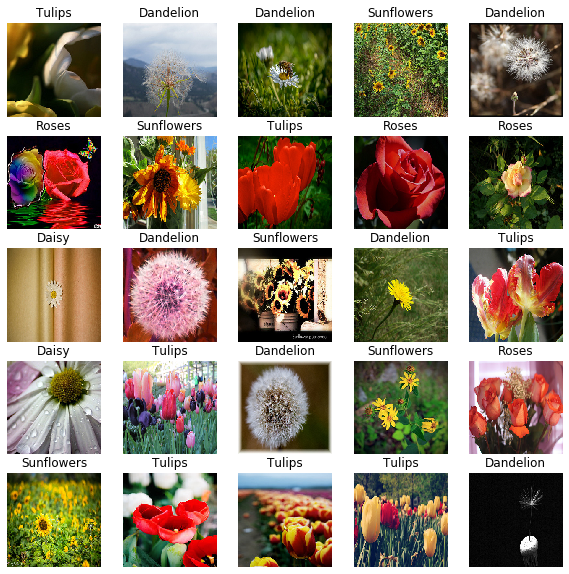

In [50]:
show_batch(image_batch, label_batch)

In [51]:
list_ds = tf.data.Dataset.list_files(str(data_dir/'*/*'))

In [53]:
type(list_ds)

tensorflow.python.data.ops.dataset_ops.DatasetV1Adapter